# Data coverage & quality

In this notebook we will go through the data tables that are used in analytics and modeling and check the coverage and quality of the data.

## Brief overview
In this notebook we primarily check for each generated data table,whether the data is missing or set to default value. We exclude all non-EUTOPIA-an affiliated articles from the analysis. Key takeaways are:
1. **Article dimension:** 
    - the majority of articles are written in English (*96.0%*) and have sufficient textual data available for analysis (*94.5%*),
    - almost *60%* of articles are open access, the same as the percentage of articles with abstract,
    - *81.4%* of articles have the references available, but references are avaialable in two different ways: a list of DOIs or a list of titles, where this will probably need to be unified,
    - only *1%* of articles are EUTOPIA-an collaborations.
2. **Author dimension:** ORCID ID is only available for *16.5%* of authors, hence this will either need to be enriched or the data source will not significantly contribute to the analysis.
3. **Collaboration novelty index:** The distribution of the collaboration novelty index is skewed to the left, with the majority of values between *0* and *10*, it is almost exponential distribution with a peak at *0*.

Considering the data coverage and quality, we will define **the notion of relevant articles** as articles that:
1. Are published by EUTOPIA institutions.
2. Have either full text, abstract or references available to ensure sufficient textual data for embeddings.
3. Are written in English.
---
**INFO**

This brings us to the coverage of *91.6% (=147K)* of relevant articles comparing to all EUTOPIA-affiliated articles.

---


## Global imports & settings

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from box import Box
from google.cloud import bigquery

from util.notebooks.data_coverage import plot_health_metrics

In [3]:
# -------------------- GLOBAL VARIABLES --------------------
PATH_TO_CONFIG_FILE = '../config.yml'

# -------------------- LOAD CONFIGURATION --------------------
# Load the configuration file
config = Box.from_yaml(filename=PATH_TO_CONFIG_FILE)
# Initialize a BigQuery client
client = bigquery.Client(project=config.GCP.PROJECT_ID)
# Set the BigQuery dataset schema
read_schema = config.GCP.READ_SCHEMA
ingestion_schema = config.GCP.INGESTION_SCHEMA
analytics_schema = config.GCP.ANALYTICS_SCHEMA

# Define the color palette
palette = {'good': config.DASHBOARD.COLORS.GOOD_COLOR,
           'warning': config.DASHBOARD.COLORS.WARNING_COLOR,
           'bad': config.DASHBOARD.COLORS.BAD_COLOR}
DEFAULT_VALUE = 'n/a'

## DIM_ARTICLE

Read the `DIM_ARTICLE` table from the BigQuery dataset and output first few rows of the table to understand what the data looks like.

In [10]:
query_article = f"""
SELECT
    *
FROM
    {read_schema}.DIM_ARTICLE
WHERE IS_EUTOPIAN_PUBLICATION
"""

df_article = client.query(query_article).to_dataframe()
df_article.head(10)

,ARTICLE_SID,ARTICLE_DOI,ARTICLE_URL,ARTICLE_TITLE,ARTICLE_LANGUAGE,ARTICLE_PUBLICATION_DT,IS_ARTICLE_ENGLISH,IS_ARTICLE_OPEN_ACCESS,HAS_SUFFICIENT_TEXT_FOR_EMBEDDING,HAS_TEXT_EMBEDDING,HAS_ABSTRACT,HAS_REFERENCES,IS_SOLE_AUTHOR_PUBLICATION,IS_INTERNAL_COLLABORATION,IS_EXTERNAL_COLLABORATION,IS_EUTOPIAN_COLLABORATION,IS_EUTOPIAN_PUBLICATION,IS_ARTICLE_RELEVANT
0,f8380c15b2d9d5ad470e4c11cee47f25,10.15288/jsad.2020.81.762,http://dx.doi.org/10.15288/jsad.2020.81.762,Gender Differences and the Role of Social Ineq...,en,2020-11-01,True,False,False,False,False,False,False,False,True,False,True,False
1,1c0d54cc0c63606066e28a0aeef9bd57,10.1080/17521483.2019.1621029,http://dx.doi.org/10.1080/17521483.2019.1621029,Editorial,ro,2019-01-02,False,True,True,True,False,False,False,False,True,False,True,False
2,dcffec197c98b8a60ce3e89d044a599b,10.1002/lemi.202359176,http://dx.doi.org/10.1002/lemi.202359176,Reinigungsprozesse in der Lebensmittelindustri...,de,2023-08-01,False,False,False,False,False,False,False,False,True,False,True,False
3,fcba056ebb795df0f6cc55c894f1341d,10.1055/s-0034-1399755,http://dx.doi.org/10.1055/s-0034-1399755,Eyes on MEGDEL: Distinctive Basal Ganglia Invo...,en,2015-02-02,True,False,False,False,False,False,False,False,True,True,True,False
4,d59106dfac2fdc588cf96adf446b8ffb,10.1212/wnl.0000000000204709,http://dx.doi.org/10.1212/wnl.0000000000204709,Impact of Genetic Susceptibility on Multiple S...,en,2024-04-09,True,False,False,False,False,False,False,False,True,False,True,False
5,b176f2eda0936fc4aceaae660e77cb6d,10.1080/19448953.2018.1506290,http://dx.doi.org/10.1080/19448953.2018.1506290,Corporate Governance following the Slovenian T...,en,2018-08-17,True,False,False,False,False,False,True,False,False,False,True,False
6,d9dfcebaf18c3426ccb3ca7b9ef8e1ea,10.51940/2022.1.257-305,http://dx.doi.org/10.51940/2022.1.257-305,Interesno ravnotežje med zastaviteljem in zast...,sl,2022-12-01,False,True,True,False,True,False,True,False,False,False,True,False
7,a5fd65ae6cb9a09137dcfda855664c7c,10.1057/palgrave.jors.2601287,http://dx.doi.org/10.1057/palgrave.jors.2601287,Reply to Ormerod—the importance of being real,en,2002-03-01,True,False,False,False,False,False,True,False,False,False,True,False
8,09b35affe95336082b22b5f92a74aa14,10.1039/d2dt03563d,http://dx.doi.org/10.1039/d2dt03563d,Tin(<scp>ii</scp>) cations stabilized by non-s...,et,2023-01-01,False,True,True,False,True,True,False,False,True,False,True,False
9,6ba5bb2b8f586032e0c99c1efbba3ffb,10.1002/ange.202012216,http://dx.doi.org/10.1002/ange.202012216,Mit N‐heterocyclischen Carbenen funktionalisie...,de,2020-12-29,False,True,True,False,True,True,False,False,True,False,True,False


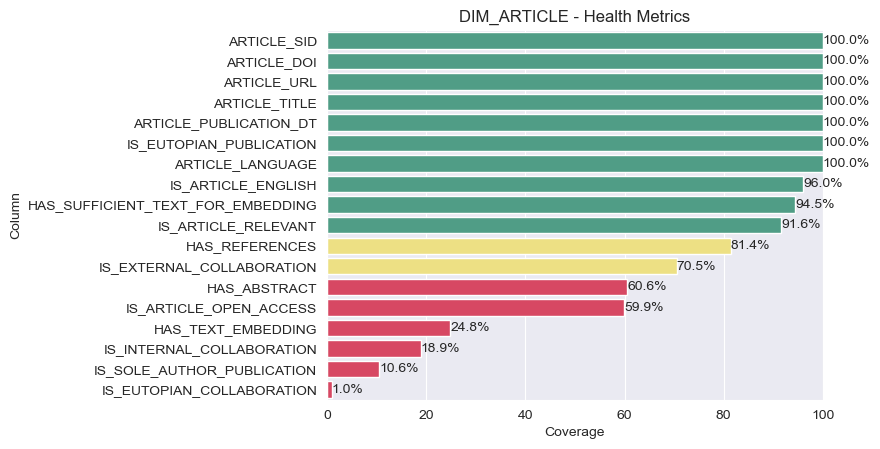

In [11]:
plot_health_metrics(df_source=df_article,
                    table_name='DIM_ARTICLE',
                    default_value=DEFAULT_VALUE,
                    palette=palette)

### Defining articles for final analysis

After checking base data coverage, we will check how many articles were published by EUTOPIA institutions. This will serve as baseline for further data coverage analysis.
We will then check the following:
1. For how many articles we have the full text available.
2. How many articles are written in English?
3. For how many articles we already have the embeddings available.


In [12]:
query_articles_eutopia = f"""
SELECT
    COUNT(DISTINCT F.ARTICLE_SID) AS ARTICLE_COUNT
FROM
    {read_schema}.FCT_COLLABORATION F
    INNER JOIN {read_schema}.DIM_ARTICLE A USING (ARTICLE_SID)
WHERE
    F.IS_EUTOPIAN_PUBLICATION
    AND A.ARTICLE_TITLE <> 'n/a' 
"""

df_articles_eutopia = client.query(query_articles_eutopia).to_dataframe()
n_relevant_articles = df_articles_eutopia.iloc[0, 0]
print(f"Number of articles published by EUTOPIA institutions: {n_relevant_articles}")

Number of articles published by EUTOPIA institutions: 160667


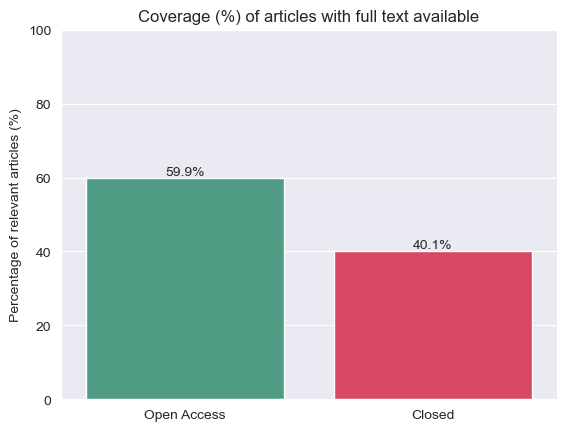

In [13]:
# Check how many articles have full text available
query_articles_full_text = f"""
SELECT
    COUNT(DISTINCT F.ARTICLE_SID) AS ARTICLE_COUNT
FROM
    {read_schema}.FCT_COLLABORATION F
    INNER JOIN {read_schema}.DIM_ARTICLE A 
        ON F.ARTICLE_SID = A.ARTICLE_SID
    INNER JOIN {read_schema}.STG_UNPAYWALL_ARTICLE OA 
        ON A.ARTICLE_DOI = OA.ARTICLE_DOI 
WHERE
    F.IS_EUTOPIAN_PUBLICATION
    AND A.ARTICLE_TITLE <> 'n/a' 
    AND OA.IS_ARTICLE_OPEN_ACCESS
"""

df_articles_full_text = client.query(query_articles_full_text).to_dataframe()
n_articles_full_text = df_articles_full_text.iloc[0, 0]

# Visualize the coverage of articles with full text available
ax = sns.barplot(x=['Open Access', 'Closed'],
                 y=[100 * n_articles_full_text / n_relevant_articles,
                    100 * (n_relevant_articles - n_articles_full_text) / n_relevant_articles],
                 hue=['Open Access', 'Closed'],
                 palette=[palette['good'], palette['bad']])

# Add the data labels to the plot (truncated to 0 decimal points)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')
plt.ylabel('Percentage of relevant articles (%)')
plt.title('Coverage (%) of articles with full text available')
plt.ylim(0, 100)
plt.show()

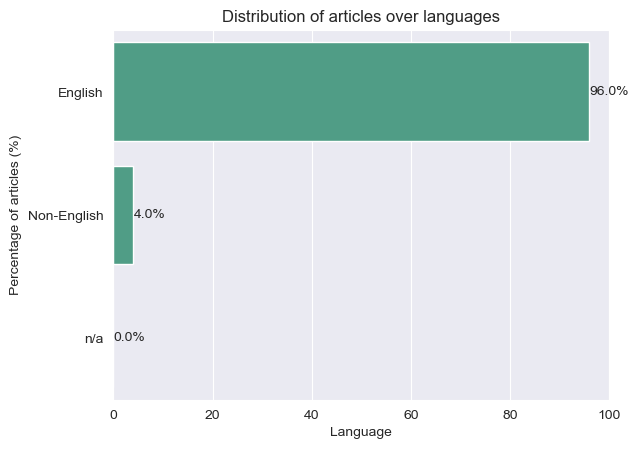

In [14]:
# Show article distribution (in %) over languages (df_article.ARTICLE_LANGUAGE) and show 'n/a' with bad color

# Split to 3 groups: English, Non-English and 'n/a'
df_article['ARTICLE_LANGUAGE_GROUP'] = df_article['ARTICLE_LANGUAGE'].apply(
    lambda x: 'English' if x == 'en' else 'Non-English' if x != DEFAULT_VALUE else DEFAULT_VALUE)

# Plot the distribution of articles over languages
ax = sns.barplot(y=df_article['ARTICLE_LANGUAGE_GROUP'].value_counts(normalize=True).index,
                 x=100 * df_article['ARTICLE_LANGUAGE_GROUP'].value_counts(normalize=True).values,
                 hue=df_article['ARTICLE_LANGUAGE_GROUP'].value_counts(normalize=True).index,
                 palette=[palette['good'] if x != DEFAULT_VALUE else palette['bad']
                          for x in df_article['ARTICLE_LANGUAGE_GROUP'].value_counts(normalize=True).index])
plt.xlabel('Language')
plt.ylabel('Percentage of articles (%)')
plt.title('Distribution of articles over languages')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')
plt.xlim(0, 100)
plt.show()

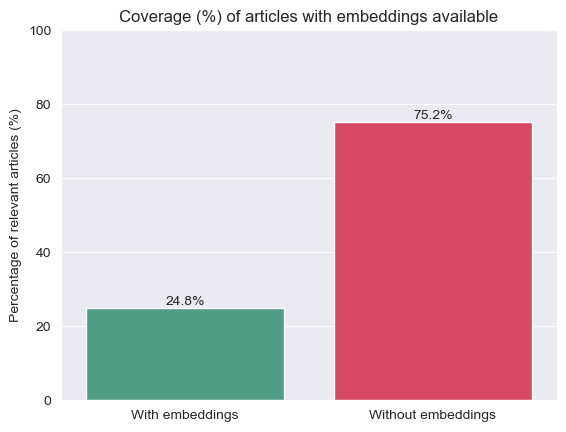

In [15]:
# Check how for how many articles we have the embeddings available
query_articles_embeddings = f"""
SELECT
    COUNT(DISTINCT F.ARTICLE_SID) AS ARTICLE_COUNT
FROM
    {read_schema}.FCT_COLLABORATION F
    INNER JOIN {read_schema}.DIM_ARTICLE A 
    ON F.ARTICLE_SID = A.ARTICLE_SID 
    INNER JOIN {analytics_schema}.TEXT_EMBEDDING_ARTICLE E
    ON E.DOI = A.ARTICLE_DOI
WHERE
    F.IS_EUTOPIAN_PUBLICATION
    AND A.ARTICLE_TITLE <> 'n/a'
"""

df_articles_embeddings = client.query(query_articles_embeddings).to_dataframe()
n_articles_with_embeddings = df_articles_embeddings.iloc[0, 0]

# Visualize the coverage of articles with embeddings available
ax = sns.barplot(x=['With embeddings', 'Without embeddings'],
                 y=[100 * n_articles_with_embeddings / n_relevant_articles,
                    100 * (n_relevant_articles - n_articles_with_embeddings) / n_relevant_articles],
                 hue=['With embeddings', 'Without embeddings'],
                 palette=[palette['good'], palette['bad']])
# Add the data labels to the plot (truncated to 0 decimal points)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')
plt.ylabel('Percentage of relevant articles (%)')
plt.title('Coverage (%) of articles with embeddings available')
plt.ylim(0, 100)
plt.show()

Given the data coverage, we see several bottlenecks on the data availability. To improve our dataset we will redefine the notion of relevant articles as articles that:
1. Are published by EUTOPIA institutions.
2. Have title available.
3. Have one of the following available: full text, abstract or references.
4. Are written in English.
5. Have the embeddings available. (TODO: this check will be added later as the data is not available yet) 

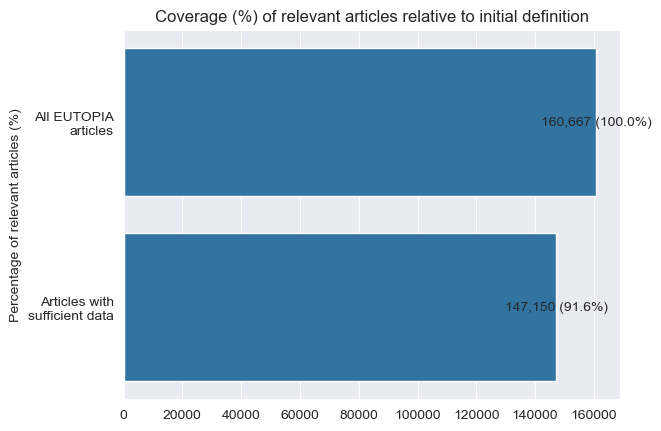

In [16]:
query_articles_relevant = f"""
SELECT
    COUNT(DISTINCT F.ARTICLE_SID) AS ARTICLE_COUNT
FROM
    {read_schema}.FCT_COLLABORATION F
WHERE
    IS_ARTICLE_RELEVANT
"""

df_articles_relevant = client.query(query_articles_relevant).to_dataframe()
n_new_relevant_articles = df_articles_relevant.iloc[0, 0]

# Calculate the percentage of relevant articles
pct_relevant_articles = 100
pct_new_relevant_articles = 100 * n_new_relevant_articles / n_relevant_articles

# Visualize the coverage of relevant articles
ax = sns.barplot(y=['All EUTOPIA\narticles', 'Articles with\nsufficient data'],
                 x=[n_relevant_articles, n_new_relevant_articles])

# Add the data labels to the plot including both the value with thousands comma and the percentage of initial definition
for i, value in enumerate([n_relevant_articles, n_new_relevant_articles]):
    pct = 100 if i == 0 else pct_new_relevant_articles
    label = f'{value:,.0f} ({pct:.1f}%)'
    ax.text(value, i, label, ha='center', va='center')

plt.ylabel('Percentage of relevant articles (%)')
plt.title('Coverage (%) of relevant articles relative to initial definition')
plt.show()

## DIM_AUTHOR
Read the `DIM_AUTHOR` table from the BigQuery dataset and output first few rows of the table to understand what the data looks like.

In [17]:
query_author = f"""
SELECT
    *
FROM
    {read_schema}.DIM_AUTHOR
"""

df_author = client.query(query_author).to_dataframe()
df_author.head(10)

,AUTHOR_SID,AUTHOR_FULL_NAME,AUTHOR_ORCID_ID
0,fc4bc41c89df3751a3c41536e97f1ef3,Georg Breidenstein,n/a
1,fe8ae54068d092e6f5dcd0f0ee1a1a6e,Mehmet Fatih Atak,n/a
2,99eaec58af0829b6c376d0d77b7468dc,Roger A Fielding,n/a
3,9fc405d1221beff272e552ca6ace8e59,Zhe Wang,n/a
4,b6ffec3f8937b52e28a958ac7efc44f8,Andreas Debrouwere,n/a
5,c08a49fdf9e5a13f57ceb63a6bf6300b,J Smitz,n/a
6,c758a819852c99f2f5469f2307f898a8,Tim Waterboer,n/a
7,d5571651dcbd2c154e1049b4316a6981,Oskar Frankl,n/a
8,d7698d36cf0a52f463b1c4265c9c08b2,Ling Tian,n/a
9,e75beae7b82e8b5d5ab8422f608218b6,Andrey V. Dobrinyin,n/a


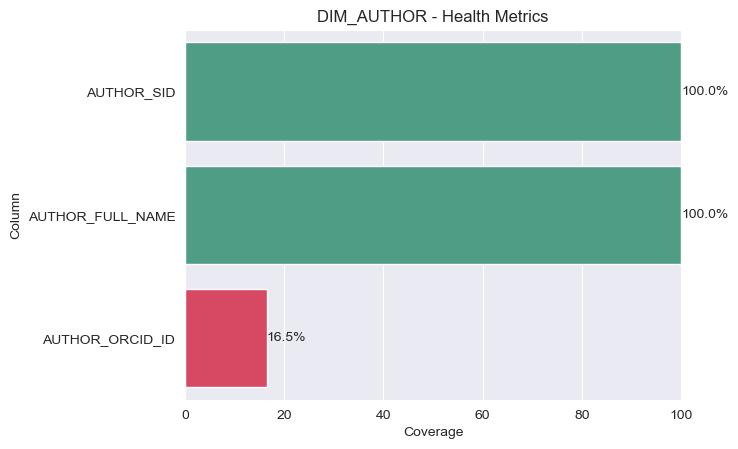

In [18]:
plot_health_metrics(df_source=df_author,
                    table_name='DIM_AUTHOR',
                    default_value=DEFAULT_VALUE,
                    palette=palette)

## FCT_COLLABORATION
Read the `FCT_COLLABORATION` table from the BigQuery dataset and output first few rows of the table to understand what the data looks like.

In [4]:
query_collaboration = f"""
SELECT
    *
FROM
    {read_schema}.FCT_COLLABORATION
WHERE IS_EUTOPIAN_PUBLICATION
"""

df_collaboration = client.query(query_collaboration).to_dataframe()
df_collaboration.head(10)

,ARTICLE_SID,AUTHOR_SID,INSTITUTION_SID,ARTICLE_PUBLICATION_DT,IS_SOLE_AUTHOR_PUBLICATION,IS_INTERNAL_COLLABORATION,IS_EXTERNAL_COLLABORATION,IS_EUTOPIAN_COLLABORATION,IS_EUTOPIAN_PUBLICATION,IS_NEW_AUTHOR_COLLABORATION,IS_NEW_INSTITUTION_COLLABORATION,IS_ARTICLE_RELEVANT,PK_COLLABORATION
0,9ab21032e353aa7278a8d380e31da7ca,7fd4e74672d9f6b44b0fc7c6b6f27994,GU,2017-09-01,False,False,True,False,True,True,True,True,b8c9f71033c5ad95eb994a706023b4f1
1,4c1427d170314c847ef6f98bbb5b4479,e6bf6c5849b4bed06e2973331241d417,OTHER,2019-02-01,False,False,True,False,True,True,True,True,0a1af4c7be535a888abc9bb7c2273eb2
2,c316990ed88537204214023b55766c5b,b962b09f814db91949ff1d1d2aee6b6c,UPF,2024-01-01,False,False,True,False,True,False,False,True,afac2e3d13d768808076e3852cfb9d1f
3,c2b09e5a4bbcb6a7fe330417bf4fcae0,f0554fad69374c861663305da7c804f1,UNI_LJ,2020-07-01,False,False,True,False,True,True,True,True,48ef7cc973483f0e66bd2b154e7ca193
4,966ba99b35070c92ee93b0ca534934cc,7d924e4a81280e4d5b57429f4e48d0b0,VUB,1998-02-01,False,True,False,False,True,False,False,True,bb773a87e85554ef5580b4e623341d18
5,e42ad04bf8bd8ddb2a6625057fcd51c7,29a26c36671b0aa66befb917f2db63cc,OTHER,2014-03-19,False,False,True,False,True,True,True,True,ca03adc8cf4ba3e5ed5fe05a3b91c9f4
6,ef823f0d0d2d4fdee64478ed16579cbb,69aa69cd1492aa2b3735b1361b9684d8,OTHER,2021-04-01,False,False,True,False,True,True,False,False,286a49ffec6f30663e3b5e47dbde6db0
7,794875559bd152ce5b1831f354674e44,dc08396791a71c039beae3348f9f42bf,OTHER,2018-06-16,False,False,True,False,True,True,True,True,e827a388e529ca6d2e03b4716b600945
8,9fc60c64251d077b2ce27fb69c3e378a,dae3e14b08cb7842d727007043a2fdac,WARWICK,2023-05-13,False,False,True,False,True,True,False,True,3f44ba83287cbda2799e0aba16b7f97d
9,1be2201f4a8088b49df2876b4a452412,af51e275f291476601a255ca320cbf8f,OTHER,2019-03-04,False,False,True,False,True,True,True,True,99d7d50ce5c393e525b69959897f1e1e


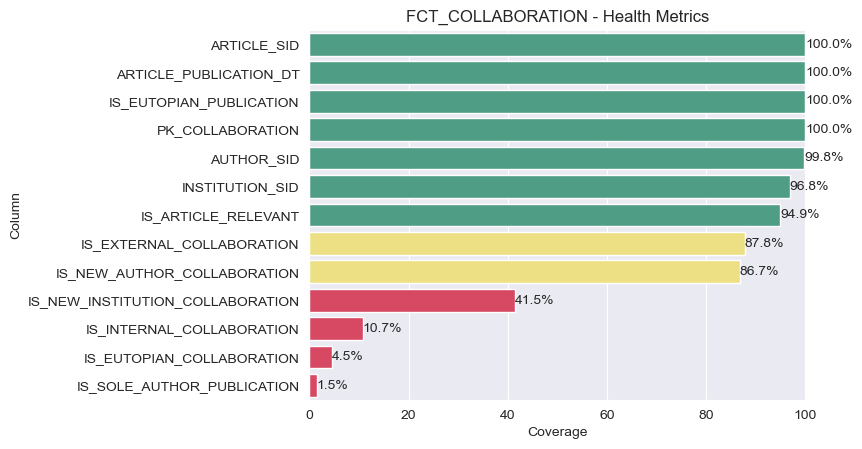

In [5]:
plot_health_metrics(df_source=df_collaboration,
                    table_name='FCT_COLLABORATION',
                    default_value=DEFAULT_VALUE,
                    palette=palette)

## FCT_COLLABORATION_NOVELTY
Read the `FCT_COLLABORATION_NOVELTY` table from the BigQuery dataset and output first few rows of the table to understand what the data looks like.

In [6]:
query_collaboration_novelty = f"""
SELECT
    *
FROM
    {read_schema}.FCT_COLLABORATION_NOVELTY
"""

df_collaboration_novelty = client.query(query_collaboration_novelty).to_dataframe()
df_collaboration_novelty.head(10)

,ARTICLE_SID,COLLABORATION_NOVELTY_INDEX,ARTICLE_PUBLICATION_DT,PK_COLLABORATION_NOVELTY
0,c7abb2636cb9542db03ca383ee420078,37.500000,2002-12-11,0064d852d7c26519d2d67da9a19ff789
1,82e94888a27d6bbcfd167809c425df50,0.477273,2005-09-30,e110c3cb41ca62d0c1288be027a8c1aa
2,c1b45f5bf23cfe6a3cf75e5d5f5f274d,0.428571,2005-09-30,85919df794354fcdb87dfac7dfbac6e2
3,333ad661095af2e467df68659bdda221,32.750000,2007-02-24,1545b2184a517fbb763c8e8a6ee64f13
4,e466fef5a158e59f2c216ebeae8bb896,36.000000,2009-04-02,5e99ee116079d473b27723b90105e8ca
5,176006df1c8dbb0494beec4cb3dff126,0.681818,2009-12-14,6f089aac7191b9ddd8afbe7f568ebd7d
6,4a548aac0600ae7df9f4b92446dec469,97.500000,2009-12-14,3dec5b723046e14190f57f5b135a5ecd
7,86e485d2fee62be631486417dad13e9d,0.571429,2010-08-27,b373852e90d5a5d1424101806365e8cf
8,cd444661480c392704a207c0602b4a70,6.983766,2011-05-10,8b795bb78c23aaa9fb9adc0539216da9
9,c244bfa213db86b592294316fcc43687,0.428571,2011-05-10,a5a8c5548f0e685ba08504cd35949e81


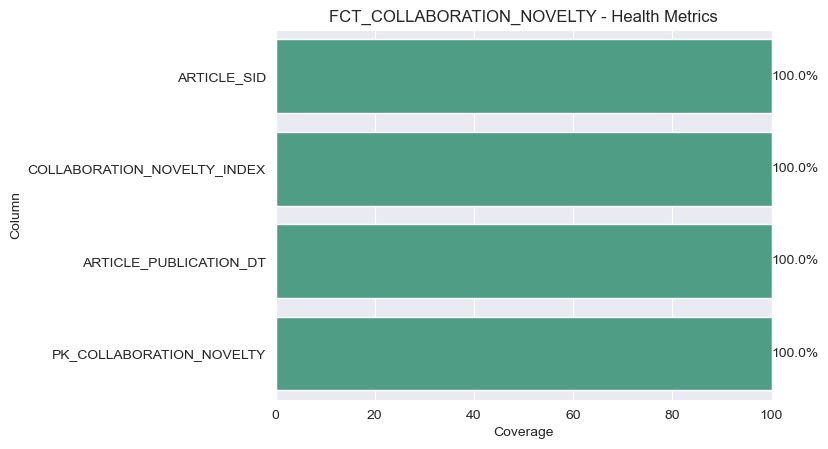

In [7]:
plot_health_metrics(df_source=df_collaboration_novelty,
                    table_name='FCT_COLLABORATION_NOVELTY',
                    default_value=DEFAULT_VALUE,
                    palette=palette)

### Collaboration Novelty Index Distribution
We will check data quality of the `FCT_COLLABORATION_NOVELTY` table by plotting the distribution of the `COLLABORATION_NOVELTY_INDEX` column.

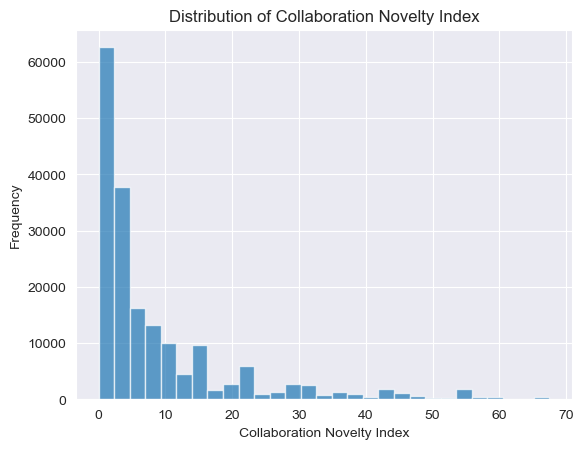

In [8]:
# Cutoff the outliers top 5 percentiles
df_collaboration_novelty_cut = df_collaboration_novelty[
    (df_collaboration_novelty['COLLABORATION_NOVELTY_INDEX'] <
     df_collaboration_novelty['COLLABORATION_NOVELTY_INDEX'].quantile(
         0.95))]

# Define custom bins
custom_bins = np.linspace(df_collaboration_novelty_cut['COLLABORATION_NOVELTY_INDEX'].min(),
                          df_collaboration_novelty_cut['COLLABORATION_NOVELTY_INDEX'].max(), 30)

# Pre-calculate histogram values
counts, bin_edges = np.histogram(df_collaboration_novelty_cut['COLLABORATION_NOVELTY_INDEX'], bins=custom_bins)

# Plot the pre-calculated histogram values
plt.hist(bin_edges[:-1], bins=bin_edges, weights=counts, alpha=0.7, label='Histogram')
plt.xlabel('Collaboration Novelty Index')
plt.ylabel('Frequency')
plt.title('Distribution of Collaboration Novelty Index')
plt.show()

## FCT_ARTICLE_TOPIC
Read the `FCT_COLLABORATION_TYPE` table from the BigQuery dataset and output first few rows of the table to understand what the data looks like.

In [9]:
query_article_topic = f"""
SELECT
    *
FROM
    {read_schema}.FCT_ARTICLE_TOPIC
"""

df_article_topic = client.query(query_article_topic).to_dataframe()
df_article_topic.head(10)

,ARTICLE_SID,RESEARCH_TOPIC_SID,RANK,PK_ARTICLE_TOPIC
0,cef09ce3e821ba425ec7f8f0c9236f04,0cbbb54371c016770e74aa3c528085f6,1,73040a4d12810e5d5663dce02e45f711
1,8e3e40810bdde8cd786891e5d3944f6d,1dedd3ef9e6254029063ddf2eb64bfcc,1,5db6148d03030e1b89de9e50b490eb96
2,25157e00c174f3cae6131d1521915220,1dedd3ef9e6254029063ddf2eb64bfcc,1,0eece02a73a90c83f0f052b5d83cee20
3,069b95f00ee6d66f69d9f4a4579a2d07,d041faf97759c83cb90efe840a9b4ab0,1,491586a8a19e6f7f77c86195bad20c3a
4,24a11c049e43b4c8c527e3a13ebaf3e5,d041faf97759c83cb90efe840a9b4ab0,1,b9611e717d7deb3f2fa6187d2a705e02
5,44e91ed3898c2b173d3cdec95760de0f,d041faf97759c83cb90efe840a9b4ab0,1,f6b4c58894d926787262c826dd1afaed
6,1750aac9bb515ec01c4d8aa5f5968bcd,d041faf97759c83cb90efe840a9b4ab0,1,a885aabc8ff00557e61a39fdbc24663d
7,b062fb84185b298f8da44dc87b929934,d041faf97759c83cb90efe840a9b4ab0,1,cd8e7168e70a39d823f30d5ef5dbbb76
8,d28bd1ffcf08495c283166ba354a68d1,d041faf97759c83cb90efe840a9b4ab0,1,fe5333f87f40f057cab09a8f09935fbc
9,23100d9a855d45dd1013d9d75f5dd05d,d041faf97759c83cb90efe840a9b4ab0,1,2af617273863f2ddb94ff3ff3b90177b


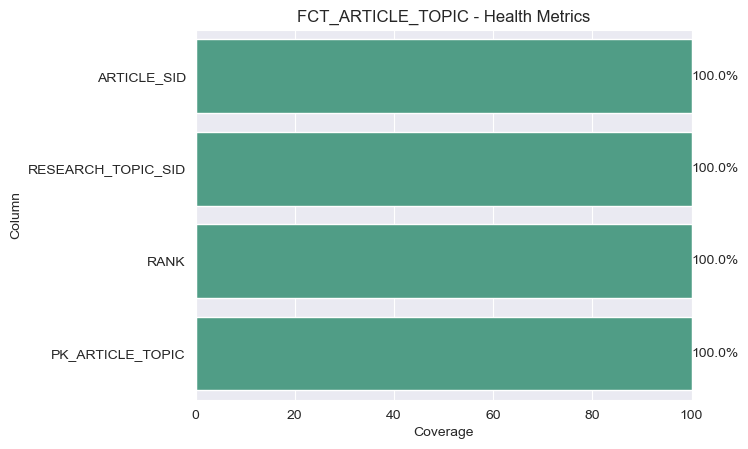

In [10]:
plot_health_metrics(df_source=df_article_topic,
                    table_name='FCT_ARTICLE_TOPIC',
                    default_value=DEFAULT_VALUE,
                    palette=palette)